# IDS Assignment 1

This is a Jupyter Notebook created for the analysis on the given dataset for the IDS assignment #1. The assignment is done collaborately by the group of 4 members. The details are as follows,

Group ID : `IDS_GROUP006`

Group Members: 
    1. Venkataramanan Krishnan : 2018AC04529
    2. Bala Kavin Pon : 2018AC04531
    3. Poornima J : 2018AC04550
    4. Ponvani : 2018AC04559 
    

## Problem statement 


**Business Context**

Using the given data set for New York City Current Job Posting data.
 
**Business Problem Understanding**

Focus on applying the learnt data analytics concepts and try to share your findings on following aspects:
1.	What are the highest paid Skills in the US market?
2.	What are the job categories, which involve above mentioned niche skills?
3.	Applying clustering concepts, please depict visually what are the different salary ranges based on job category and years of experience

The analysis on the data is done in the following sequence of steps. 

1. [Import Libraries](#import)
2. [Load the data](#loaddata)
3. [Exploratory Data Analysis](#eda)
4. [Identification of Variable](#variableidentification)
5. [Feature Engineering](#featureengineering)
6. [Clustering](#clustering)


<a id="import"></a>

## Step 1: Import libraries

Installation commands in case the required packages are not available in the system

In [ ]:
!pip install nltk
!pip install scikit-learn

In [2]:
import pandas as pd
import numpy as np

# Graphs and Plotting related dependencies
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# Plot stylesheet
plt.style.use('ggplot')

plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = 'Helvetica'

# Text preprocessing related libraries
import re
import nltk


<a id="loaddata"></a>
## Step 2: Loading Data

Loading the dataset from the `jobs.csv` file. The dataset will be loaded into Dataframe which is further used for data pre-processing and exploratory data analysis. 


In [149]:
# Reading data from the CSV file
job_data = pd.read_csv("input/jobs.csv", delimiter=",")

# Gist of data
job_data.head()

,Job ID,Agency,Posting Type,# Of Positions,Business Title,Civil Service Title,Title Code No,Level,Job Category,Full-Time/Part-Time indicator,...,Additional Information,To Apply,Hours/Shift,Work Location 1,Recruitment Contact,Residency Requirement,Posting Date,Post Until,Posting Updated,Process Date
0,87990,DEPARTMENT OF BUSINESS SERV.,Internal,1,Account Manager,CONTRACT REVIEWER (OFFICE OF L,40563,1,NaN,NaN,...,"Salary range for this position is: $42,405 - $...",NaN,NaN,NaN,NaN,New York City residency is generally required ...,2011-06-24T00:00:00.000,NaN,2011-06-24T00:00:00.000,2019-11-26T00:00:00.000
1,97899,DEPARTMENT OF BUSINESS SERV.,Internal,1,"EXECUTIVE DIRECTOR, BUSINESS DEVELOPMENT",ADMINISTRATIVE BUSINESS PROMOT,10009,M3,NaN,F,...,NaN,"In addition to applying through this website, ...",NaN,NaN,NaN,New York City residency is generally required ...,2012-01-26T00:00:00.000,NaN,2012-01-26T00:00:00.000,2019-11-26T00:00:00.000
2,132292,NYC HOUSING AUTHORITY,External,52,Maintenance Worker - Technical Services-Heatin...,MAINTENANCE WORKER,90698,0,Maintenance & Operations,F,...,1. A Motor Vehicle Driverâ€™s License valid i...,"Click the ""Apply Now"" button.",NaN,NaN,NaN,NYCHA has no residency requirements.,2013-10-24T00:00:00.000,NaN,2013-12-12T00:00:00.000,2019-11-26T00:00:00.000
3,132292,NYC HOUSING AUTHORITY,Internal,52,Maintenance Worker - Technical Services-Heatin...,MAINTENANCE WORKER,90698,0,Maintenance & Operations,F,...,1. A Motor Vehicle Driverâ€™s License valid i...,"Click the ""Apply Now"" button.",NaN,NaN,NaN,NYCHA has no residency requirements.,2013-10-24T00:00:00.000,NaN,2013-12-12T00:00:00.000,2019-11-26T00:00:00.000
4,133921,NYC HOUSING AUTHORITY,Internal,50,Temporary Painter,PAINTER,91830,0,Maintenance & Operations,F,...,SPECIAL NOTE: 1. This is a temporary assig...,"Click the ""Apply Now"" button.",NaN,NaN,NaN,NYCHA has no residency requirement.,2014-01-09T00:00:00.000,NaN,2014-01-08T00:00:00.000,2019-11-26T00:00:00.000


<a id="eda"></a>
## Step 3: Exploratory Data Analysis

### Information about the data

The scheme of the data can be explored by examining the information about the dataset such as number of entries, column count, data type of the columns and the null constraints. As part of the Exploratory Data Analysis, we need to find out the properties of the attributes and identify the suitable variables for further analysis. 


In [150]:
job_data.info()
print("---"*40)
job_data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3020 entries, 0 to 3019
Data columns (total 28 columns):
Job ID                           3020 non-null int64
Agency                           3020 non-null object
Posting Type                     3020 non-null object
# Of Positions                   3020 non-null int64
Business Title                   3020 non-null object
Civil Service Title              3020 non-null object
Title Code No                    3020 non-null object
Level                            3020 non-null object
Job Category                     3018 non-null object
Full-Time/Part-Time indicator    2811 non-null object
Salary Range From                3020 non-null float64
Salary Range To                  3020 non-null float64
Salary Frequency                 3020 non-null object
Work Location                    3020 non-null object
Division/Work Unit               3020 non-null object
Job Description                  3020 non-null object
Minimum Qual Requirements    

,Job ID,# Of Positions,Salary Range From,Salary Range To,Recruitment Contact
count,3020.000000,3020.000000,3020.000000,3020.000000,0.0
mean,383678.501987,2.424172,58140.495550,84325.707875,NaN
std,51779.379258,8.149189,26806.810446,43186.883961,NaN
min,87990.000000,1.000000,0.000000,10.360000,NaN
25%,378264.750000,1.000000,48535.000000,60990.000000,NaN
50%,402960.500000,1.000000,57944.000000,81535.000000,NaN
75%,415741.000000,1.000000,72476.000000,105000.000000,NaN
max,424117.000000,190.000000,218587.000000,234402.000000,NaN


### Step 3.1: Identification of Variables

The variables need to be identified for further processing and analysis. The variables can be identified two ways,
1. Variables with minimum percentage of null values. Here **30%** of total dataset volume will be allowed as null or NaN values. The variables that are more than 30% will not be considered for analysis. 
2. The date attributes will also not contribute for analysis so they will be removed. 


In [151]:
# Casting the date fields from string to datetime
job_data['Posting Date'] = pd.to_datetime(job_data['Posting Date'])
job_data['Process Date'] = pd.to_datetime(job_data['Process Date'])
job_data['Post Until'] = pd.to_datetime(job_data['Post Until'])
job_data['Posting Updated'] = pd.to_datetime(job_data['Posting Updated'])

print("No. of numerical columns: {0}".format(len(job_data.select_dtypes(include=np.number).columns.tolist())))
print("No. of non-numerical columns: {0}".format(len(job_data.select_dtypes(exclude=np.number).columns.tolist())))
print("No. of date columns: {0} ".format(len(job_data.select_dtypes(include=np.datetime64).columns.tolist())))


No. of numerical columns: 5
No. of non-numerical columns: 23
No. of date columns: 4 


From the requirement doc we need to find below items. 
* Skills
* Skills Vs Salary in (desc order)
* Job Category
* Job Category belong to Skills
* Year of Exp
* Salary-Range Vs Job-Category Vs Year of Exp

From the requirements we found that the numerical columns like 
1. `Salary Range From` 
2. `Salary Range To` are required. 

The categorical and text variables like 
1. `Job category`, 
2. `Preferred Skills` are required. 

The data on **`Years of experience`** is `Preferred Skills` field. It needs to be extracted from the preferred skills and made as a separate variable.

In [152]:
# Remove the whitespace in column names
job_data.columns = job_data.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')', '')

### Step 3.1: Finding Missing Values

In [153]:
def plot_null_data(dframe):
    # Figure size
    sns.set(rc={'figure.figsize':(9,8)})
    ax = sns.heatmap(dframe.isnull(), cbar=False)
    ax.set_title("Dataset columns with null values")

print("Row count of each column with missing values:")
job_data.isnull().sum()

Row count of each column with missing values:


job_id                              0
agency                              0
posting_type                        0
#_of_positions                      0
business_title                      0
civil_service_title                 0
title_code_no                       0
level                               0
job_category                        2
full-time/part-time_indicator     209
salary_range_from                   0
salary_range_to                     0
salary_frequency                    0
work_location                       0
division/work_unit                  0
job_description                     0
minimum_qual_requirements          16
preferred_skills                  439
additional_information           1180
to_apply                            1
hours/shift                      2097
work_location_1                  1598
recruitment_contact              3020
residency_requirement               2
posting_date                        2
post_until                       2048
posting_upda

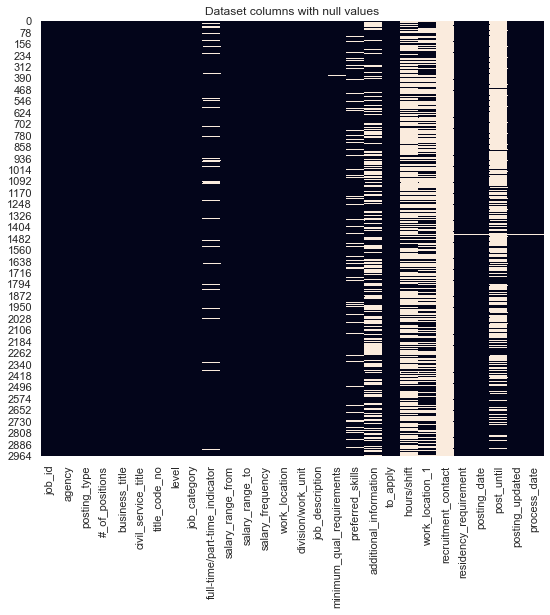

In [154]:
# Figure size
plot_null_data(job_data)

### Step 3: Imputing the missing values

The variables like Job Category, Full-Time/Part-Time indicator,Minimum Qual Requirements, Preferred Skills,Residency Requirement have missing values(NaN).

These have to be handled by filling meaningful values. These variables are categorical in nature, hence they can be imputed either by using Mode strategy or constant value strategy. 

In [155]:
# Identifying suitable variables based on the percentage of null values and the data type

null_limit = job_data.shape[0] * 0.3 # Minimum # number of records without null or NaN values
identified_cols = list()

data_with_null = job_data.isnull().sum() # Columns with null value count
try:
    for items in data_with_null.iteritems(): # Iterate through the pd.Series object
        if items[1] < null_limit:
            if job_data[items[0]].dtype in ('int64','object','float64'):
                identified_cols.append(items[0])
except ValueError as ve:
    pass

print("Identified variables:\n{0}".format(identified_cols))

Identified variables:
['job_id', 'agency', 'posting_type', '#_of_positions', 'business_title', 'civil_service_title', 'title_code_no', 'level', 'job_category', 'full-time/part-time_indicator', 'salary_range_from', 'salary_range_to', 'salary_frequency', 'work_location', 'division/work_unit', 'job_description', 'minimum_qual_requirements', 'preferred_skills', 'to_apply', 'residency_requirement']


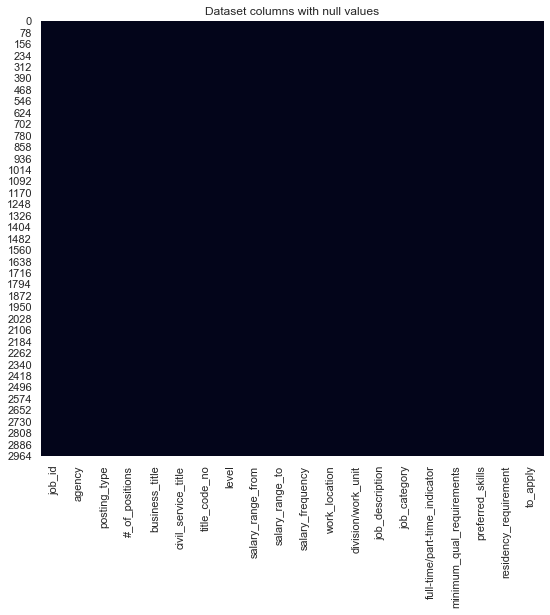

In [156]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy="most_frequent")
nan_cols = ['job_category', 'full-time/part-time_indicator','minimum_qual_requirements', 'preferred_skills','residency_requirement', 'to_apply']
cols = [col for col in identified_cols if col not in nan_cols]

# print(cols)
# Apply the imputation on the dataset
imputed_data = pd.DataFrame(imputer.fit_transform(job_data[nan_cols]), columns=nan_cols)

# # imputed_data.head()
posting_data = pd.concat([job_data[cols], imputed_data], axis=1)
# Empty values plot
# combined_data.isnull().sum()
plot_null_data(posting_data)

<a id="featureengineering"></a>

## Step 4: Feature Engineering

There are few variables in the dataset are of type text(refer the columns <a href="#datainfo">info</a>). We need perform certain feature engineering operations to clean, transform and reduce those features. 

The first and foremost text preprocessing step is to remove unwanted characters such as special characters, unwanted whitespaces and punctuation. The following functions will be used to remove the special charaters from the text data.


### 1. Salary field manipulation

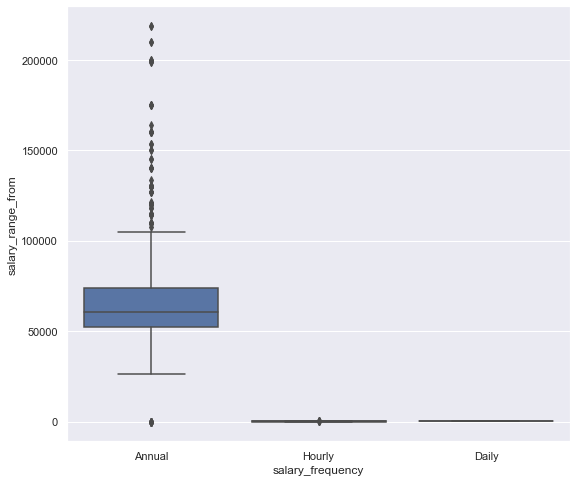

In [157]:
sns.boxplot(x='salary_frequency',y='salary_range_from', data=job_data)
plt.show()

In [158]:
print("Frequency: Hourly\n",job_data[posting_data['salary_frequency'] == 'Hourly']['salary_range_from'].describe())
print("---"*40)
print("Frequency: Daily\n",job_data[posting_data['salary_frequency'] == 'Daily']['salary_range_from'].describe())
print("---"*40)
print("Frequency: Annual\n",job_data[posting_data['salary_frequency'] == 'Annual']['salary_range_from'].describe())

Frequency: Hourly
 count    216.000000
mean      27.139398
std       14.847692
min        8.750000
25%       15.500000
50%       20.370600
75%       34.630000
max       73.370000
Name: salary_range_from, dtype: float64
------------------------------------------------------------------------------------------------------------------------
Frequency: Daily
 count     46.000000
mean     332.431957
std       86.970303
min      175.100000
25%      277.040000
50%      342.540000
75%      373.030000
max      501.920000
Name: salary_range_from, dtype: float64
------------------------------------------------------------------------------------------------------------------------
Frequency: Annual
 count      2758.000000
mean      63655.961777
std       20883.465495
min           0.000000
25%       52000.000000
50%       60433.000000
75%       73938.000000
max      218587.000000
Name: salary_range_from, dtype: float64


It clearly indicates that `Salary_Range_From` is dependend on `Salary frequency`. Hence we have standarized the salary range to annual.

Daily - 8 hrs 
Monthly - 20 days 
Annual  - 12 Months

In [159]:
"""
    convert salary to annual salary. 
"""
def project_salary_to_annual(freq,salary):
    if (freq == 'Hourly'):
        return salary * 8 * 20 * 12
    elif (freq == 'Daily'):
        return salary * 20 * 12    
    else :
        return salary
    
# Invoking the method
posting_data['projected_salary_from'] = posting_data.apply(lambda x: project_salary_to_annual(x.salary_frequency, x.salary_range_from), axis=1)
posting_data['projected_salary_to'] = posting_data.apply(lambda x: project_salary_to_annual(x.salary_frequency, x.salary_range_to), axis=1)
    

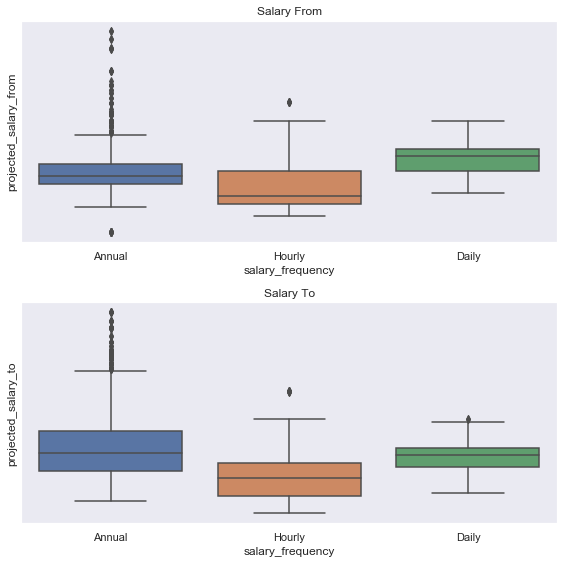

In [160]:
fig, axes = plt.subplots(2,1, figsize=(8,8), squeeze=False)
axes[0][0].set_title("Salary From")
axes[1][0].set_title("Salary To")

sns.boxplot(x='salary_frequency',y='projected_salary_from', data=posting_data, ax=axes[0][0])
sns.boxplot(x='salary_frequency',y='projected_salary_to', data=posting_data, ax=axes[1][0])
plt.setp(axes, yticks=[])
plt.tight_layout()
plt.show()

The above plot shows a clean dark background without any white lines across the column names, which implies that there are not NaN values in the dataset. 

### 2. Year of experience field manipulation

In [161]:
"""
    Read and load the stopwords from the text file.
"""
def get_stopwords():
    with open('./input/stopwords.txt', 'r') as fp:
        stopword_list = fp.read().split()
        
    return stopword_list

"""
    Extracting the year value from the preferred skills attribute
"""
def extract_years_exp(doc):
    phrase = ""
    num_year = 2 # Minimum years of experience
    try:
        str_num_pattern = r'(zero|one|two|three|four|five|six|seven|eight|nine|ten)'
        num_dict = {'zero':0, 'one':1, 'two':2, 'three':3, 'four':4,'five':5,'six':6,'seven':7,'eight':8,'nine':9,'ten':10}
        # Search for text numeric value
        match = re.search(str_num_pattern, doc, re.IGNORECASE)
        if match:
            statement = re.sub(str_num_pattern, str(num_dict[match.group(0).lower()]), doc.lower(), re.IGNORECASE)
            statement = statement.strip()
        
            exp_pattern = r'.?[(0-9)|(0-9\+)]\s+years'
        
            exp_phrase = re.search(exp_pattern, statement, re.IGNORECASE)
            if exp_phrase:
                opr_pattern = r'(\+|\)|\(|\-|years)'
                phrase = exp_phrase.group(0).strip()    
                year_val = re.sub(opr_pattern, "", phrase).strip()
                
                if year_val:
                    num_year = int(year_val)
                    if int(year_val) > 10:
                        num_year = int(year_val[0])
                    else:
                        num_year
        else:
            phrase = np.nan
    except IndexError as ie:
        pass
    return num_year

def extract_skills(doc):
    statement = ""
    num_year = 1
    try:
        patterns = (r'=?.(with|proficiency)\s+\w{3}+', r'\w{2}+\s+(skills|acquired)')
        # Search for text numeric value
        for ptrn in patterns:
            match = re.search(ptrn, doc, re.IGNORECASE)
            if match:
                statement = match.group(0).lower().strip()
                break
    except IndexError as ie:
        pass
    return statement


'''
    Cleanse the special characters, white space and punctuations.
'''
def cleanse_text_impurities(text_val):
    try:
        # remove the special characters
        text_val = re.sub(r'[^(a-zA-Z)|(0-9)\s]', ' ', text_val, re.I|re.A)
        text_val = text_val.strip()
        
        return text_val
    except ValueError as ve:
        print("Error while cleasing the data: {0}".format(ve))

# Global stop words list
stop_words = get_stopwords()        
        
'''
    Removes the english language stop words
''' 
def remove_stopwords(text_val):
    try:
        word_tokenizer = nltk.WordPunctTokenizer()
        # tokenize the sentences
        tokens = word_tokenizer.tokenize(text_val)
        
        # Filter stop words 
        filtered_tokens = [tok for tok in tokens if tok not in stop_words]
        
        return ' '.join(filtered_tokens)
        
    except ValueError as ve:
        print("Error while cleasing the data: {0}".format(ve))


"""
    Normalize the text corpus
"""
def normalize_corpus(doc):
    # remove the special characters
    doc = re.sub(r'[^(a-zA-Z)\s]', '', doc, re.I|re.A)
    doc = doc.strip().lower()
    
    word_tokenizer = nltk.WordPunctTokenizer()

    # tokenize the sentences
    tokens = word_tokenizer.tokenize(doc)

    # Filter stop words 
    filtered_tokens = [tok for tok in tokens if tok not in stop_words]

    return ' '.join(filtered_tokens)   

#### Cleansing of text value

The cleansing activity of text value usually involves with removal of whitespaces, special characters and other ASCII characters. Here, the cleansing function is applied for all the given text fields. 

In [162]:
posting_data.columns

Index(['job_id', 'agency', 'posting_type', '#_of_positions', 'business_title',
       'civil_service_title', 'title_code_no', 'level', 'salary_range_from',
       'salary_range_to', 'salary_frequency', 'work_location',
       'division/work_unit', 'job_description', 'job_category',
       'full-time/part-time_indicator', 'minimum_qual_requirements',
       'preferred_skills', 'residency_requirement', 'to_apply',
       'projected_salary_from', 'projected_salary_to'],
      dtype='object')

In [163]:
str_cols = ['job_description', 'preferred_skills']

# Iterate through the dataframe and apply the cleansing function
for col in str_cols:
    posting_data[col] = posting_data[col].apply(cleanse_text_impurities)

posting_data[str_cols]

,job_description,preferred_skills
0,Division of Economic Financial Opportunity (...,Excellent interpersonal and organizational ski...
1,The New York City Department of Small Business...,ERROR NAME
2,Under direct supervision assist in the routin...,1 A High School Diploma or GED 2 CDL Dri...
3,Under direct supervision assist in the routin...,1 A High School Diploma or GED 2 CDL Dri...
4,Responsibilities of selected candidates will i...,ERROR NAME
...,...,...
3015,The City of New York Department of Housing Pre...,Excellent judgment editing writing and inter...
3016,Your Team The Office of Enforcement and Neig...,Must possess excellent written and verbal comm...
3017,Your Team The Office of Enforcement and Neig...,Must possess excellent written and verbal comm...
3018,The Commission on Human Rights (the Commission...,Advanced working proficiency in Microsoft Offi...


### 2. Feature manipulation - Preferred Skills

In [164]:
# Removing stop words from the two text fields Job description and Preferred skills
for col in str_cols:
    posting_data[col+'new'] = posting_data[col].apply(remove_stopwords)

posting_data[str_cols]

,job_description,preferred_skills
0,Division of Economic Financial Opportunity (...,Excellent interpersonal and organizational ski...
1,The New York City Department of Small Business...,ERROR NAME
2,Under direct supervision assist in the routin...,1 A High School Diploma or GED 2 CDL Dri...
3,Under direct supervision assist in the routin...,1 A High School Diploma or GED 2 CDL Dri...
4,Responsibilities of selected candidates will i...,ERROR NAME
...,...,...
3015,The City of New York Department of Housing Pre...,Excellent judgment editing writing and inter...
3016,Your Team The Office of Enforcement and Neig...,Must possess excellent written and verbal comm...
3017,Your Team The Office of Enforcement and Neig...,Must possess excellent written and verbal comm...
3018,The Commission on Human Rights (the Commission...,Advanced working proficiency in Microsoft Offi...


### N-Gram text phrase parsing

We need to convert the Preferred skills data into n-gram string phrases. Then we need to remove `communication and written skill` as it common

In [165]:
from nltk import ngrams

def bigram(sentence):
    grams = ngrams(sentence.split(), 2)
    return [ gram[0]+'_'+gram[1]  for gram in grams ]

def trigram(sentence):
    grams = ngrams(sentence.split(), 3)
    return [ gram[0]+'_'+gram[1]+'_'+gram[2]  for gram in grams ]

def tetragram(sentence):
    grams = ngrams(sentence.split(), 4)
    return [ gram[0]+'_'+gram[1]+'_'+gram[2]+'_'+gram[3]  for gram in grams ]
    
def pentagram(sentence):
    grams = ngrams(sentence.split(), 5)
    return [ gram[0]+'_'+gram[1]+'_'+gram[2]+'_'+gram[3]+'_'+gram[4]  for gram in grams ]

"""
    Removing common terms in the given corpus
"""
def remove_common_skils(skills):
    skills = [skill for skill in skills if 'communication' not in skill]
    skills = [skill for skill in skills if 'written' not in skill]
    skills = [skill for skill in skills if 'year' not in skill]
    return skills

Creating join id index before exploding data into tetra gram.

In [166]:
posting_data['row_id'] = posting_data.index

In [167]:
posting_data.columns

Index(['job_id', 'agency', 'posting_type', '#_of_positions', 'business_title',
       'civil_service_title', 'title_code_no', 'level', 'salary_range_from',
       'salary_range_to', 'salary_frequency', 'work_location',
       'division/work_unit', 'job_description', 'job_category',
       'full-time/part-time_indicator', 'minimum_qual_requirements',
       'preferred_skills', 'residency_requirement', 'to_apply',
       'projected_salary_from', 'projected_salary_to', 'job_descriptionnew',
       'preferred_skillsnew', 'row_id'],
      dtype='object')

In [168]:
preferred_skill_cleaned = 'preferred_skillsnew'
salary_to_compare = 'projected_salary_to'

sub_df = posting_data[[preferred_skill_cleaned, salary_to_compare,'row_id']].copy()

# Grouping with preferred skills to get distinct data, since one preferred desc will have multiple description.
# there is no doubt that skills in mode value will occupy the top sopt. Just to avoid that taking unique descriptions
sub_df = sub_df.groupby(preferred_skill_cleaned).agg(salary=(salary_to_compare, max)).reset_index(drop=False)

# Applying tetra-gram (4 gram)
ps_tetragram = 'preferred_skills_tetragram'
sub_df[ps_tetragram] = sub_df[preferred_skill_cleaned].apply(tetragram)

sub_df[ps_tetragram] = sub_df[ps_tetragram].apply(remove_common_skils)

tetra_df =sub_df.explode(ps_tetragram).groupby(ps_tetragram).agg(
max_salary=('salary', max),
sum_salary=('salary', sum ),
cnt_salary=('salary', 'count') ).sort_values(['max_salary','sum_salary','cnt_salary'], ascending=False)

tetra_df['Average_Salary'] = tetra_df['sum_salary']/tetra_df['cnt_salary']
tetra_df = tetra_df[tetra_df['cnt_salary'] >=5 ].sort_values(['Average_Salary','cnt_salary'], ascending=False)
tetra_df=tetra_df.reset_index(drop=False)

In [169]:
# tetra_df['preferred_skills_tetragram']
tetra_df['preferred_skills_tetragram']

0                 Ability_manage_multiple_tasks
1        organization_project_management_skills
2              City_State_Federal_environmental
3      Federal_environmental_requirements_water
4                  Knowledge_City_State_Federal
                         ...                   
679           obtained_United_States_accredited
680               program_approved_American_Bar
681           program_program_approved_American
682                Peace_Corps_viewed_favorably
683               Strong_ethic_attention_detail
Name: preferred_skills_tetragram, Length: 684, dtype: object

In [170]:
# Bag Of Words to select skill related n-grams
with open('./input/BOW.txt', 'r',newline='') as f:
    bow = [line.rstrip('\n\r') for line in f.readlines()]
def skill_check(text, bow=bow):
    value = [ 1 for word in bow if word in text]
    return len(value)

# check if 4-gram word is a skill or not
tetra_df['is_present'] = tetra_df[ps_tetragram].apply(skill_check)
tetra_df = tetra_df[tetra_df['is_present'] > 0 ].sort_values(['Average_Salary','cnt_salary'], ascending=False).reset_index(drop=True)
tetra_df['index_num'] = tetra_df.index

### Finally displaying picked Top 10 from identified Top 35 values from n-Gram

*Note: We can take top 10 skill directly, but since n-gram is used, its better for a domain expert to pick the top 10, which will be more meaningful*

Conditions Used
- Atleast 5 occurance in any Preferred Skill Desc
- Bag of Word was generated by picking all noun synonyms of word skill
- Sorted using Average salary 

In [171]:
# To pick top 35 from n-grams
tetra_df = tetra_df.iloc[:35]

#Handpicked Top 10 from the top 35
tetra_df['selected'] = tetra_df['index_num'].apply(lambda x: x in [2,4,8,12,16,19,20,26,31,34])
color = (tetra_df['selected'] == True).map({True: 'background-color: yellow', False: ''})
tetra_df.style.apply(lambda s: color)

,preferred_skills_tetragram,max_salary,sum_salary,cnt_salary,Average_Salary,is_present,index_num,selected
0,Knowledge_design_construction_industry,178873,997478,6,166246,1,0,False
1,computer_skills_knowledge_MS,178873,997478,6,166246,2,1,False
2,design_construction_industry_standards,178873,997478,6,166246,1,2,True
3,skills_experience_writing_reviewing,178873,997478,6,166246,1,3,False
4,skills_knowledge_MS_Office,178873,997478,6,166246,2,4,True
5,experience_writing_reviewing_contract,178873,829045,5,165809,1,5,False
6,skills_towards_technical_technical,194395,980234,6,163372,1,6,False
7,towards_technical_technical_audience,194395,980234,6,163372,1,7,False
8,knowledge_operations_design_construction,186555,1.10088e+06,8,137610,3,8,True
9,knowledge_MS_Office_software,178873,1.37372e+06,10,137372,2,9,False


### 3. Feature manipulation - Years of experience 

The year of experience is a required information to understand more on the relationship between the salary and years of experience. However, the data is hidden in the text data of `Preferred Skills` field. We need to perform a search to identify the pattern of years and transform the extracted information into a numerical values. 

In [172]:
# posting_data['Experience Phrase'] = posting_data.head(50)['Preferred Skills'].apply(extract_years_exp)
posting_data['years_of_experience'] = posting_data['preferred_skills'].apply(extract_years_exp)

In [173]:
posting_data['years_of_experience']

0       2
1       2
2       2
3       2
4       2
       ..
3015    2
3016    2
3017    2
3018    2
3019    2
Name: years_of_experience, Length: 3020, dtype: int64

## Step 5: Analysis

The analysis are done on the following questions,

* a. What are the highest paid skills in the US market?
* b. What are the highest paid Job Category in the US market?


#### 1. Top paid skills in US market

In [132]:
analysis_data = pd.concat([posting_data['job_category'], tetra_df], axis=1)

In [148]:
tetra_df.columns

Index(['preferred_skills_tetragram', 'max_salary', 'sum_salary', 'cnt_salary',
       'Average_Salary', 'is_present', 'index_num', 'selected'],
      dtype='object')

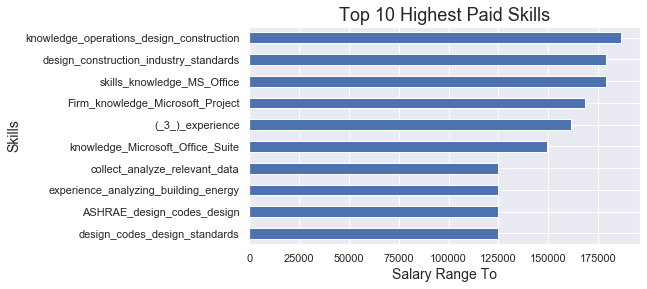

In [174]:
df_to_display=tetra_df[tetra_df['selected'] == True ][['preferred_skills_tetragram','max_salary']].sort_values(['max_salary'], ascending=False).reset_index(drop=True)
df_to_display.index=df_to_display['preferred_skills_tetragram']

fig, barax = plt.subplots(figsize=(7,4))
df_to_display.plot(ax=barax, kind='barh', legend = False)

barax.set_title("Top 10 Highest Paid Skills", fontsize=18)
barax.set_ylabel("Skills", fontsize=14)
barax.set_xlabel("Salary Range To", fontsize=14)
# barax.legend(bbox_to_anchor=(1.0, 1.00))
barax.invert_yaxis()
plt.show()

#### 2. Top paid Job category in US market

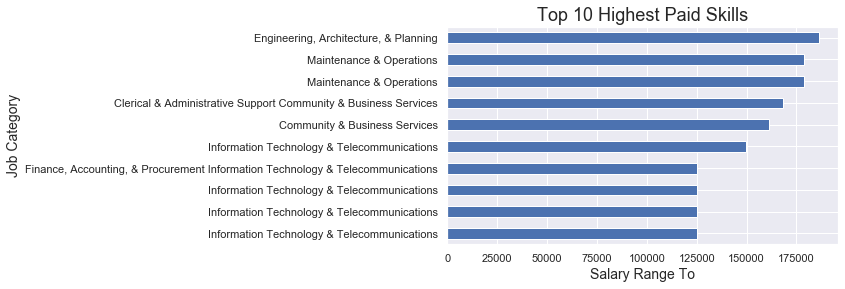

In [122]:
df_to_display=analysis_data[analysis_data['selected'] == True ][['job_category','max_salary']].sort_values(['max_salary'], ascending=False).reset_index(drop=True)
df_to_display.index=df_to_display['job_category']

fig, barax = plt.subplots(figsize=(7,4))
df_to_display.plot(ax=barax, kind='barh', legend = False)

barax.set_title("Top 10 Highest Paid Skills", fontsize=18)
barax.set_ylabel("Job Category", fontsize=14)
barax.set_xlabel("Salary Range To", fontsize=14)
# barax.legend(bbox_to_anchor=(1.0, 1.00))
barax.invert_yaxis()
plt.show()

### Job Category Vs Skills Vs Salary

In [135]:
## Back track 
# Top Skills -> Preferred Skill Desc -> Job Category
top_skils = df_to_display.reset_index(drop=True)
top_skils['idx_order']=top_skils.index

top_skills
# sub_df['row_index']=sub_df.index
# join_df = sub_df[['preferred_skills_tetragram','row_index']].copy()

# explode_df = join_df.explode('preferred_skills_tetragram')
# df_inner = pd.merge(explode_df,top_skils , on='preferred_skills_tetragram', how='inner')

# df_joined=df_inner.groupby('row_index').agg(skills_list=('preferred_skills_tetragram', list)).reset_index(drop=False)
# j1=pd.merge(sub_df,df_joined , on='row_index', how='inner')

# df_jc=pd.merge(posting_data,j1 , on='Preferred_Skillsnew', how='inner')[['row_id','salary_range_from','salary_range_to','job_category','skills_list']]

# df_jc_final = df_jc.groupby('job_category').agg(
#     count=('row_id', 'count'),
#     salary_from=('salary_range_from', min),
#     salary_to=('salary_range_to', max),
#     skills_list=('skills_list', list))
                                                                        
# flatten = lambda lis: list(set([item for sublist in lis for item in sublist]))
# df_jc_final

NameError: name 'top_skills' is not defined

<a id="clustering"></a>

## 6. Clustering Technique

### Step 1: Bag of words

In [55]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer

# Job description will be used to cluster the data
bow_transformer = CountVectorizer(analyzer=normalize_corpus).fit(posting_data['job_category'])
bow_matrix = bow_transformer.transform(posting_data['job_category'])

print("Shape of the Bag of words :{0}".format(bow_matrix.shape))

Shape of the Bag of words :(3020, 21)


### Step 2: Word vectorizer

In [57]:
tfidf_transfomer = TfidfTransformer()
tfidf_matrix = tfidf_transfomer.fit_transform(bow_matrix)

print("Shape of the TFIDF vector :{0}".format(tfidf_matrix.shape))

Shape of the TFIDF vector :(3020, 21)


### Step 3: Building Cluster Model

In [174]:
scaler = MinMaxScaler(feature_range = (0, 1))
scaler.fit(posting_data[['salary_range_from', 'years_of_experience']].values.reshape(1,-1))
scaled = scaler.transform(posting_data[['salary_range_from', 'years_of_experience']].values.reshape(1,-1))


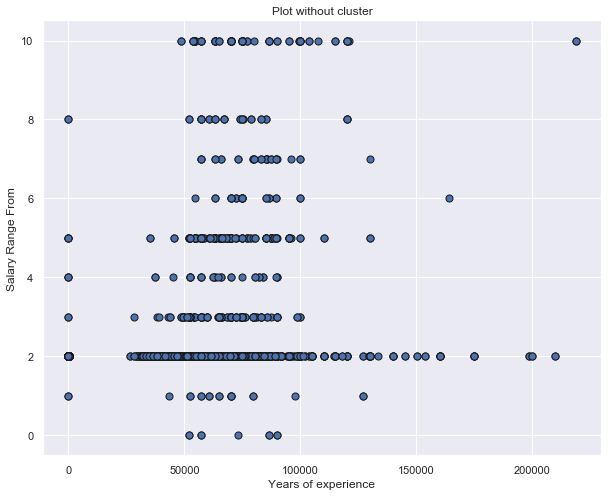

In [175]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

# Plot the values before clustering the data
y = posting_data['years_of_experience'].values
x = posting_data['salary_range_from'].values

fig, axes = plt.subplots(figsize=(10,8))
axes.set_title("Plot without cluster")
axes.set_xlabel("Years of experience")
axes.set_ylabel("Salary Range From")
plt.scatter(x, y, s=50, edgecolor='k')

plt.show()

In [177]:
# Apply clustering algorithm
km_model = KMeans(n_clusters=30, init="k-means++", n_init=10, max_iter=100)

km_model.fit(tfidf_matrix)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=100,
       n_clusters=30, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [178]:
labels = km_model.labels_

array([ 3,  3, 23, ..., 11, 26, 26])

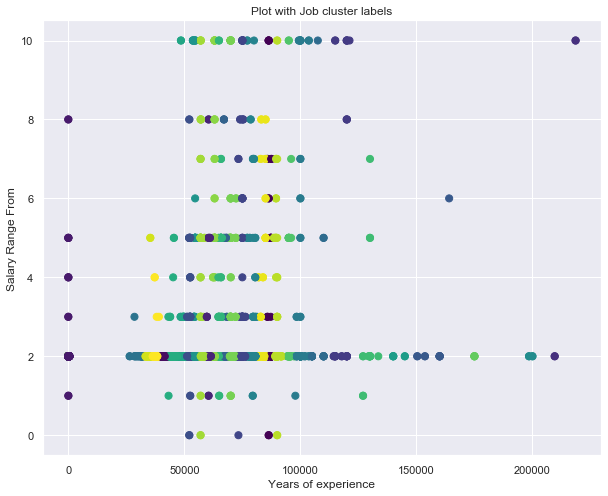

In [180]:
fig, axes = plt.subplots(figsize=(10,8))
axes.set_title("Plot with Job cluster labels")
axes.set_xlabel("Years of experience")
axes.set_ylabel("Salary Range From")
plt.scatter(x, y, c=labels, s=50, cmap='viridis')

plt.show()



### Thank You